In [50]:
from joblib import Parallel, delayed
from datetime import time, datetime
from tqdm import tqdm

In [51]:
def humanize_unixtime(unix_time):
    time = datetime.fromtimestamp(int(unix_time)).strftime('%d-%m-%Y %H.%M.%S')
    return time

In [52]:
def get_24hr_details(input_type, month,unix_time):
    
    #hashes list to store all the hashes
    details_dict = dict()
    
    #read files
    if input_type == "inputs":
        filename = "/content/drive/MyDrive/edges2010/updated/inputs2010_{}.txt".format(str(month+1))
    if input_type == "outputs":
        filename = "/content/drive/MyDrive/edges2010/updated/outputs2010_{}.txt".format(str(month+1))

    with open(filename) as file:
        for line in file:
            #split by tab char to get the details present
            line = line.replace('\n', '')
            print("line",line)
            details = line.split("\t")

            #hash present at the second value
            #append in the list
            #details_dict[details[1]] = dict()
            unix_time_24 = unix_time + 24 * 60 * 60
            print("unix_time",unix_time)
            print("unix_time_24",unix_time_24)

            if details[0] >= str(unix_time) and details[0] <= str(unix_time_24):
                details_dict[details[1]] = dict()
                if input_type == "inputs":
                    #details_dict[details[1]]["input"] = details[2:]
                    details_dict[details[1]]['time'] = details[0]
                    details_dict[details[1]]["input"] = details[2:]
                    details_dict[details[1]]["human"] = humanize_unixtime(details[0])
                
                if input_type == "outputs":
                    #details_dict[details[1]]["output"] = details[2:]
                    details_dict[details[1]]["output"] = details[2:]
                    details_dict[details[1]]["time"] = details[0]
                    details_dict[details[1]]["human"] = humanize_unixtime(details[0])
            
    return details_dict

In [53]:
#as there is data file for each month
month = 1

#input dict to store all the input details
input_dict = dict()

#output dict to store all the output details
output_dict = dict()

In [54]:
import time
from datetime import datetime

start_time = time.time()
dt = datetime(2010,1,23,20,17,11)
unixtimestamp = int((dt - datetime(1970,1,1)).total_seconds())

#calling function
inp = Parallel(n_jobs=-1)(delayed(get_24hr_details)("inputs", i,unixtimestamp) for i in tqdm(range(month)))
for d in inp:
    input_dict.update(d)

end_time = time.time()
print("Time taken to read the input file data is {}".format(end_time - start_time))

100%|██████████| 1/1 [00:00<00:00, 433.25it/s]


Time taken to read the input file data is 0.40171003341674805


In [55]:
inp

[{'60285': {'human': '23-01-2010 20.17.11',
   'input': ['61803', '1'],
   'time': '1264277831'},
  '61803': {'human': '23-01-2010 20.17.11',
   'input': ['63838', '0'],
   'time': '1264277831'},
  '70095': {'human': '24-01-2010 14.14.25',
   'input': ['e7bead8fdda66ea1d0433002d58c7d195762b131a6a1c0cef912c589169fca3d',
    '0'],
   'time': '1264342465'}}]

In [56]:
print("Total details in input dict is: {}".format(len(input_dict)))

Total details in input dict is: 3


In [57]:
start_time = time.time()
dt = datetime(2010,1,23,20,17,11)
unixtimestamp = int((dt - datetime(1970,1,1)).total_seconds())

#calling function
inp = Parallel(n_jobs=-1)(delayed(get_24hr_details)("outputs", i,unixtimestamp) for i in tqdm(range(month)))
for d in inp:
    output_dict.update(d)

end_time = time.time()
print("Time taken to read the output file data is {}".format(end_time - start_time))

100%|██████████| 1/1 [00:00<00:00, 426.42it/s]

Time taken to read the output file data is 0.020209789276123047


In [58]:
print("Total details in output dict is: {}".format(len(output_dict)))

Total details in output dict is: 3


In [59]:
pip install igraph

In [60]:
from igraph import *
import networkx as nx
from matplotlib import pyplot as plt

In [61]:
g = nx.DiGraph()

In [62]:
print(g)

DiGraph with 0 nodes and 0 edges


In [63]:
input_dict

{'60285': {'human': '23-01-2010 20.17.11',
  'input': ['61803', '1'],
  'time': '1264277831'},
 '61803': {'human': '23-01-2010 20.17.11',
  'input': ['63838', '0'],
  'time': '1264277831'},
 '70095': {'human': '24-01-2010 14.14.25',
  'input': ['e7bead8fdda66ea1d0433002d58c7d195762b131a6a1c0cef912c589169fca3d',
   '0'],
  'time': '1264342465'}}

In [64]:
output_dict

{'60285': {'human': '23-01-2010 20.17.11',
  'output': ['18nM13Qq7hHf2hVkV2aZx8QhvWfFBMY14h', '200000000'],
  'time': '1264277831'},
 '61803': {'human': '23-01-2010 20.17.11',
  'output': ['noaddress',
   '4700000000',
   '1EGDbCKGbizMFgwjn4WNHTvAthsvrsixDv',
   '200000000'],
  'time': '1264277831'},
 '70095': {'human': '24-01-2010 14.14.25',
  'output': ['18nM13Qq7hHf2hVkV2aZx8QhvWfFBMY14h', '5000000000'],
  'time': '1264342465'}}

In [65]:
for key, value in output_dict.items():
    input_details = input_dict[key]
    output_dict[key]["input"] = input_details["input"]

print("Total details in linked dict is: {}".format(len(output_dict)))

Total details in linked dict is: 3


In [66]:
updated_dict = dict(sorted(output_dict.items(), key=lambda item: item[1]['time']))

In [67]:
updated_dict

{'60285': {'human': '23-01-2010 20.17.11',
  'input': ['61803', '1'],
  'output': ['18nM13Qq7hHf2hVkV2aZx8QhvWfFBMY14h', '200000000'],
  'time': '1264277831'},
 '61803': {'human': '23-01-2010 20.17.11',
  'input': ['63838', '0'],
  'output': ['noaddress',
   '4700000000',
   '1EGDbCKGbizMFgwjn4WNHTvAthsvrsixDv',
   '200000000'],
  'time': '1264277831'},
 '70095': {'human': '24-01-2010 14.14.25',
  'input': ['e7bead8fdda66ea1d0433002d58c7d195762b131a6a1c0cef912c589169fca3d',
   '0'],
  'output': ['18nM13Qq7hHf2hVkV2aZx8QhvWfFBMY14h', '5000000000'],
  'time': '1264342465'}}

In [70]:
for key, value in tqdm(updated_dict.items()):
    
    #print("Current transaction hash {}".format(key))
    hash_of_transc = key
    
    
    input_details_of_hash_of_transc = value["input"]
    output_details_of_hash_of_transc = value["output"]
    
    #print("Transaction input details {}".format(input_details_of_hash_of_transc))
    #print("Transaction output details {}".format(output_details_of_hash_of_transc))
    
    #going over all input transactions
    for i in range(0, len(input_details_of_hash_of_transc), 2):
        
        input_hash = input_details_of_hash_of_transc[i]
        output_index = input_details_of_hash_of_transc[i+1]
        
        #print(input_hash)
        #print(output_index)
        if input_hash not in updated_dict.keys():
            #g.add_vertex(input_hash)
            #print("no address")
            pass
        else:
            #g.add_vertex(input_hash)
            #get output details of that input transaction
            get_amounts = updated_dict[input_hash]["output"]
            
            #print(get_amounts)
            address = get_amounts[int(output_index)]
            amount = get_amounts[2*int(output_index)+1]
            
            
            #add input transaction node
            g.add_node(input_hash, s='s', label='transaction', color="r")
            
            #add address node
            g.add_node(address, s ='s', label='address', color="b")
            
            #add output transaction node
            g.add_node(hash_of_transc, s='o', label='transaction', color="r")
            
            #add edge between input transaction and address
            g.add_edge(input_hash, address, weight=int(amount))
            
            #add edge between address and output transaction
            g.add_edge(address, key, weight=int(amount))

100%|██████████| 3/3 [00:00<00:00, 14446.51it/s]


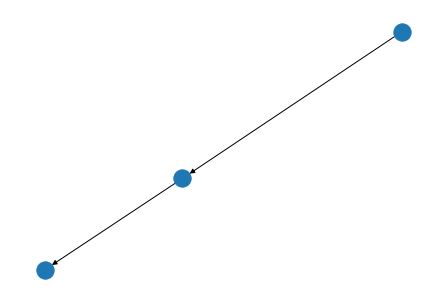

In [73]:
import matplotlib.pyplot as plt
nx.draw(g)

In [74]:
pip install stellargraph

     |████████████████████████████████| 435 kB 30.4 MB/s 


In [75]:
from stellargraph import StellarGraph
square_foo_bar = StellarGraph.from_networkx(g)
print(square_foo_bar.info())

StellarDiGraph: Directed multigraph
 Nodes: 3, Edges: 2

 Node types:
  transaction: [2]
    Features: none
    Edge types: transaction-default->address
  address: [1]
    Features: none
    Edge types: address-default->transaction

 Edge types:
    transaction-default->address: [1]
        Weights: all 2e+08
        Features: none
    address-default->transaction: [1]
        Weights: all 2e+08
        Features: none
